In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
df.shape

(614, 13)

In [73]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [75]:
df=df.drop(columns='Loan_ID',axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [77]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [79]:
x=df['Gender'].mode()
x

0    Male
dtype: object

In [80]:
df['Gender']=df['Gender'].fillna('Male')

In [81]:
df['Gender'].isnull().sum()

0

In [82]:
df['Married'].mode()

0    Yes
dtype: object

In [83]:
df['Married']=df['Married'].fillna('Yes')

In [84]:
df['Married'].isnull().sum()

0

In [85]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [86]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [87]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [88]:
df['Dependents'].mode()

0    0
dtype: object

In [89]:
df['Dependents']=df['Dependents'].fillna(0)

In [90]:
df['Dependents'].unique()

array(['0', '1', '2', 3, 0], dtype=object)

In [91]:
df['Dependents'].isnull().sum()

0

In [92]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [93]:
df['Education'].isnull().sum()

0

In [94]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [95]:
df['Self_Employed'].mode()

0    No
dtype: object

In [96]:
df['Self_Employed']=df['Self_Employed'].fillna(0)

In [97]:
df['Self_Employed'].isnull().sum()

0

In [98]:
df['Self_Employed'].unique()

array(['No', 'Yes', 0], dtype=object)

In [99]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [100]:
df['ApplicantIncome'].isnull().sum()

0

In [101]:
df['CoapplicantIncome'].isnull().sum()

0

In [102]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [103]:
df['LoanAmount'].mode()

0    120.0
dtype: float64

In [104]:
df['LoanAmount']=df['LoanAmount'].fillna(120.0)

In [105]:
df['LoanAmount'].isnull().sum()

0

In [106]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [107]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [108]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [109]:
df['Loan_Amount_Term'].isnull().sum()

0

In [110]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [111]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [112]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [113]:
df['Credit_History'].isnull().sum()

0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [115]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


(array([0, 1]), <a list of 2 Text xticklabel objects>)

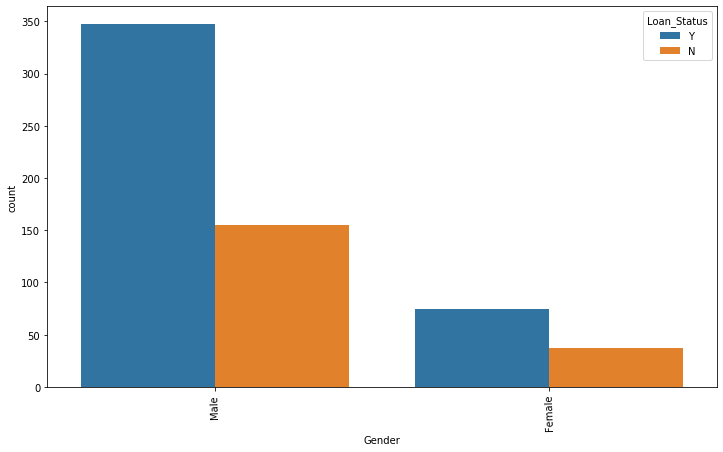

In [116]:
fig=plt.figure(figsize=(12,7))
sns.countplot(x=df['Gender'],hue= 'Loan_Status', data=df)
plt.xticks(rotation = 92)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

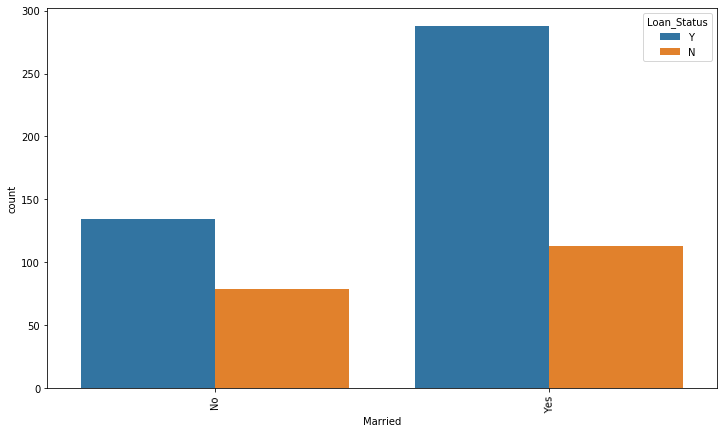

In [117]:
fig=plt.figure(figsize=(12,7))
sns.countplot(x=df['Married'],hue= 'Loan_Status', data=df)
plt.xticks(rotation = 92)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

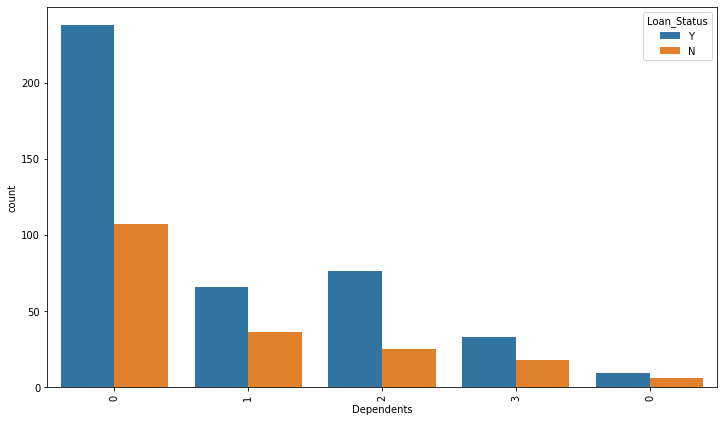

In [118]:
fig=plt.figure(figsize=(12,7))
sns.countplot(x=df['Dependents'],hue= 'Loan_Status', data=df)
plt.xticks(rotation = 92)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

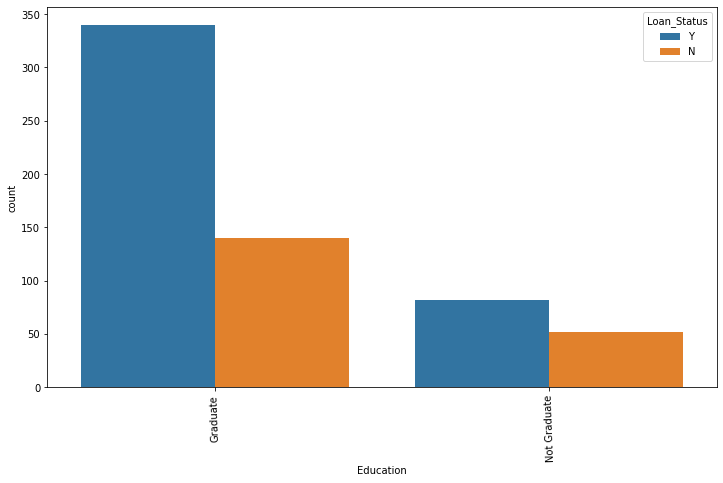

In [119]:
fig=plt.figure(figsize=(12,7))
sns.countplot(x=df['Education'],hue= 'Loan_Status', data=df)
plt.xticks(rotation = 92)

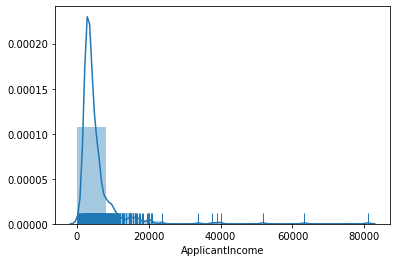

In [120]:
sns.distplot(df['ApplicantIncome'],bins=10,kde=True,rug=True)

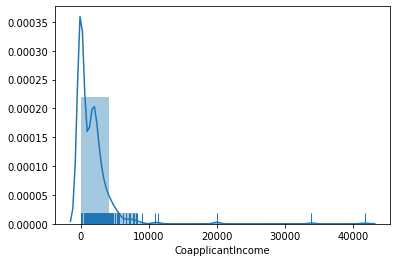

In [121]:
sns.distplot(df['CoapplicantIncome'],bins=10,kde=True,rug=True)

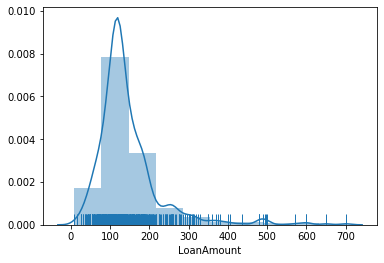

In [122]:
sns.distplot(df['LoanAmount'],bins=10,kde=True,rug=True)

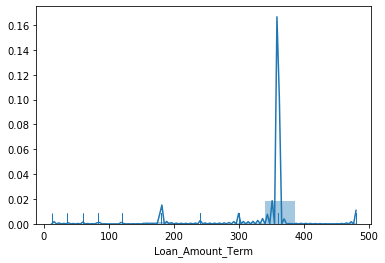

In [123]:
sns.distplot(df['Loan_Amount_Term'],bins=10,kde=True,rug=True)

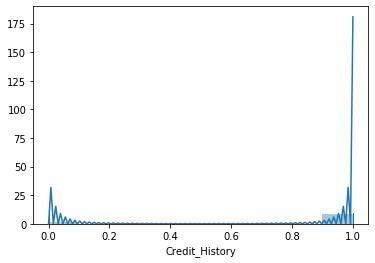

In [124]:
sns.distplot(df['Credit_History'],bins=10,kde=True,rug=True)

In [125]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

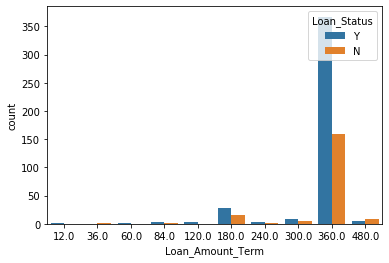

In [126]:
sns.countplot(x=df['Loan_Amount_Term'],hue='Loan_Status',data=df)

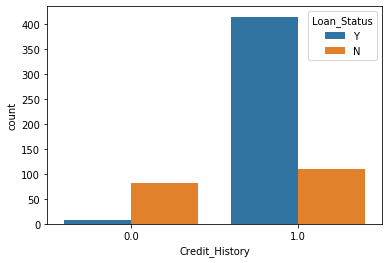

In [127]:
sns.countplot(x=df['Credit_History'],hue='Loan_Status',data=df)

In [128]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le=LabelEncoder()

In [144]:
df.dtypes


Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [146]:
df['Gender']=df['Gender'].astype(str)

In [147]:
df['Gender']=le.fit_transform(df['Gender'])

In [148]:
df['Married']=df['Married'].astype(str)

In [149]:
df['Married']=le.fit_transform(df['Married'])

In [150]:
df['Dependents']=df['Dependents'].astype(str)
df['Education']=df['Education'].astype(str)
df['Self_Employed']=df['Self_Employed'].astype(str)
df['Property_Area']=df['Property_Area'].astype(str)
df['Loan_Status']=df['Loan_Status'].astype(str)

In [151]:
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [152]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [153]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,0.021135,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.027052,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.052597,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,0.000820,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.021135,0.027052,0.052597,0.000820,1.000000,0.092967,-0.052384,0.081900,-0.017729,-0.041027,-0.028730,-0.011332
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.092967,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.052384,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.081900,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.017729,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.041027,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


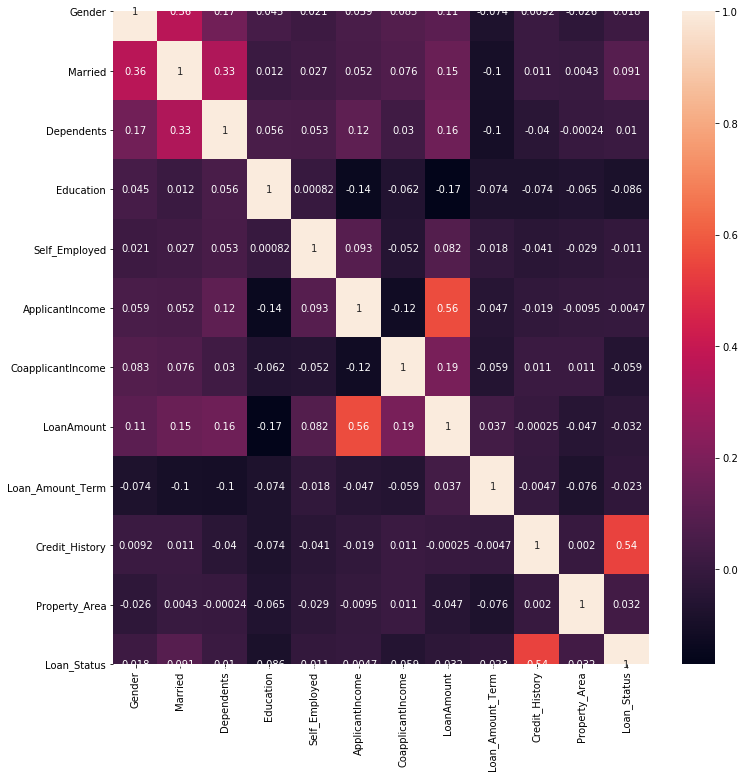

In [154]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

Gender                  AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Married              AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Dependents            AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education            AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Self_Employed        AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
ApplicantIncome         AxesSubplot(0.125,0.677439;0.133621x0.0920732)
CoapplicantIncome    AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
LoanAmount            AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
Loan_Amount_Term     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Credit_History       AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Property_Area           AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Loan_Status          AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
dtype: object

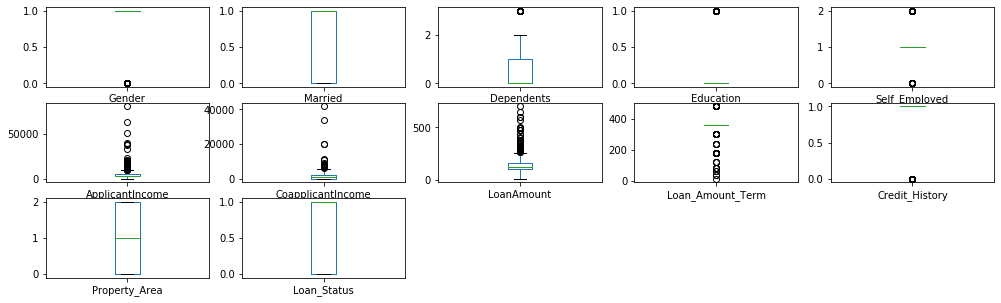

In [155]:
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(17,12))

In [156]:
df1=df

In [157]:
from scipy.stats import zscore

In [158]:
z_score=abs(zscore(df1))
df1.shape

(614, 12)

In [159]:
df1=df1.loc[(z_score<3).all(axis=1)]

In [160]:
df1.shape

(577, 12)

In [161]:
df1['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [162]:
df1['Gender'].unique()

array([1, 0], dtype=int64)

Gender                  AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Married              AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Dependents            AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education            AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Self_Employed        AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
ApplicantIncome         AxesSubplot(0.125,0.677439;0.133621x0.0920732)
CoapplicantIncome    AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
LoanAmount            AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
Loan_Amount_Term     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Credit_History       AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Property_Area           AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Loan_Status          AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
dtype: object

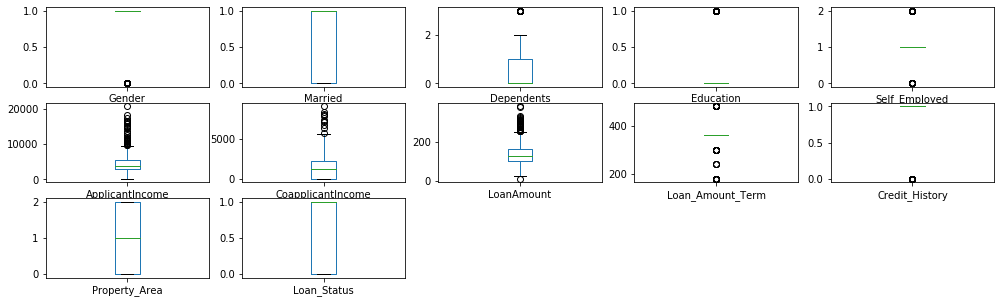

In [163]:
df1.plot(kind='box',subplots=True,layout=(7,5),figsize=(17,12))

In [164]:
df1.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [165]:
X1=df1.drop(columns='Loan_Status',axis=1)
y=df1['Loan_Status']

In [166]:
X1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        0.520568
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [167]:
for x in X1.columns:
    if X1.skew().loc[x]>0.55:
        X1[x]=np.log1p(X1[x])

In [168]:
X1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        0.520568
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.651832
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [169]:
for x in X1.columns:
    if X1.skew().loc[x]<-0.55:
        X1[x]=np.power(X1[x],3)

In [170]:
X1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        0.520568
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount           0.258730
Loan_Amount_Term     0.715786
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
Sc=StandardScaler()

In [173]:
X=Sc.fit_transform(X1)

In [174]:
X

array([[ 0.47713685, -1.36251079, -0.77514304, ...,  0.13118445,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.13118445,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.77514304, ...,  0.13118445,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.13118445,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36281681, ...,  0.13118445,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.77514304, ...,  0.13118445,
        -2.38941464, -0.03952504]])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=100)

In [177]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,roc_curve,auc

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [179]:
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=7)
KN=KNeighborsClassifier(n_neighbors=7)
NBG=GaussianNB()
SVMC=SVC()
RFC=RandomForestClassifier(n_estimators='warn',max_depth=None)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [180]:
model_list=[]

model_list.append(('LogisticRegression', LR))

model_list.append(('DecisionTreeClassifier', DTC))

model_list.append(('KNeighborsClassifier', KN))

model_list.append(('GaussianNB', NBG))

model_list.append(('SVC', SVMC))

model_list.append(('RandomForestClassifier', RFC))

model_list.append(('GradientBoostingClassifier', GBC))

model_list.append(('AdaBoostingClassifier', ABC))

In [181]:
from sklearn.model_selection import cross_val_score

********************* LogisticRegression *****************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is 0.8218390804597702


cross_val is 0.8182017543859649


F1-score is: 0.8812260536398467
roc_auc_socre: 0.7370670265407108


classification_report:               precision    recall  f1-score   support

           0       0.93      0.49      0.64        57
           1       0.80      0.98      0.88       117

    accuracy                           0.82       174
   macro avg       0.87      0.74      0.76       174
weighted avg       0.84      0.82      0.80       174



confusion_matrix: [[ 28  29]
 [  2 115]]





********************* DecisionTreeClassifier *****************
DecisionTreeClassi

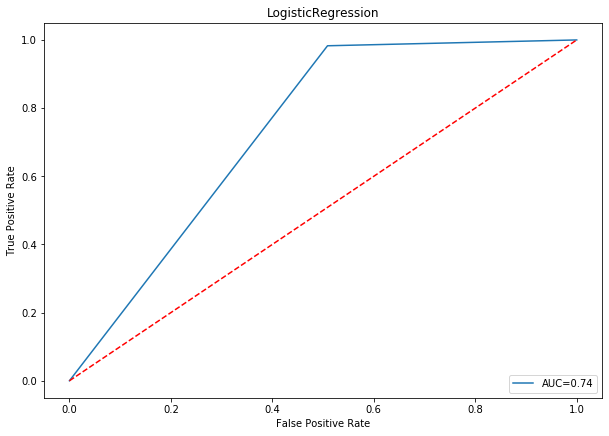

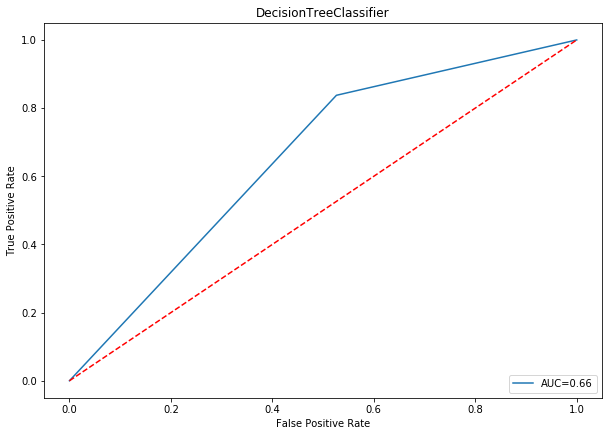

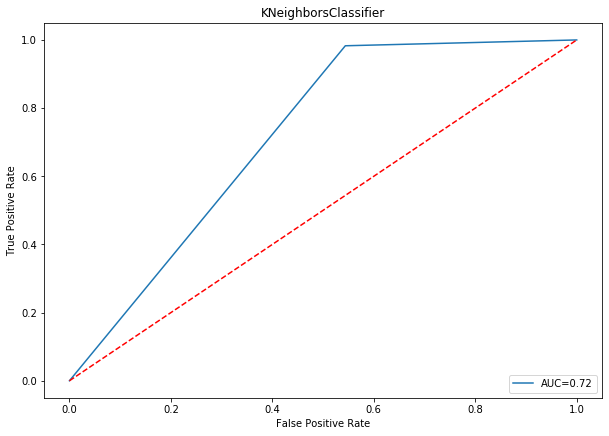

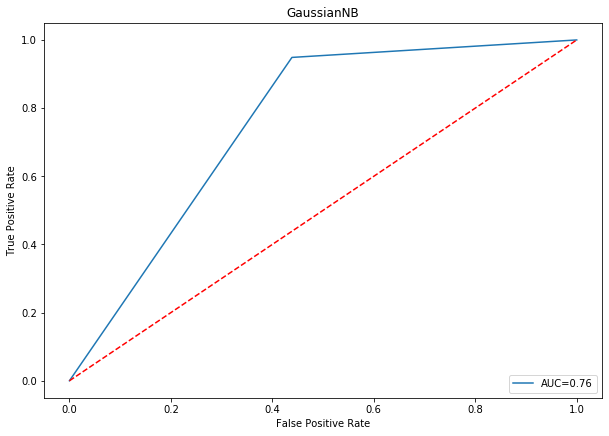

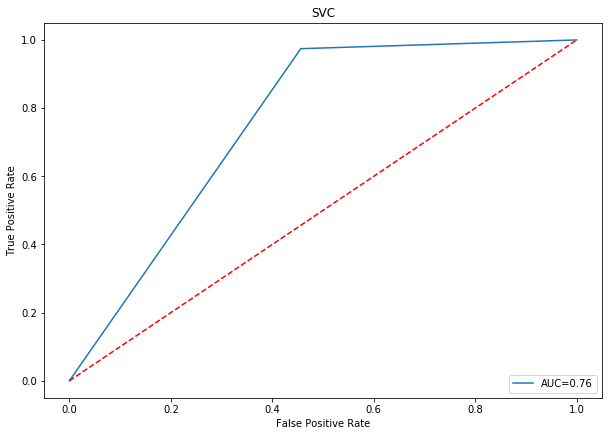

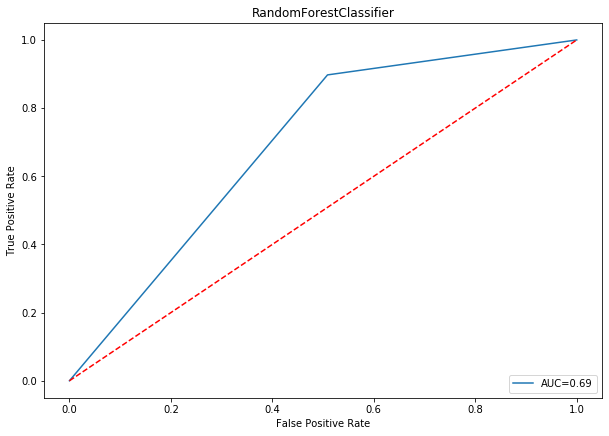

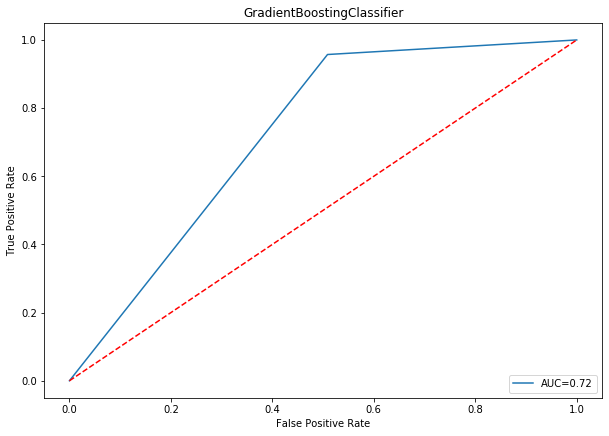

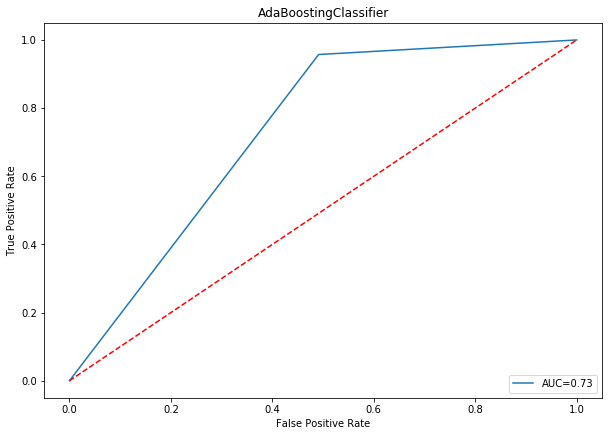

In [182]:
Model=[]
accuracy=[]
CS=[]
F1_scor=[]
rocscore=[]
for name,model in model_list:
    print('*********************',name,'*****************')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pred=model.predict(X_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,X,y, cv=10,scoring='accuracy').mean()
    print('cross_val is',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(pred,y_test)
    print('F1-score is:',f1)
    F1_scor.append(f1*100)
    false_positive_rate,true_positive_rate, thresholds= roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_socre:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report:', classification_report(y_test,pred))
    print('\n')
    print('confusion_matrix:', confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [183]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_score':F1_scor,'Roc_Auc_curve':rocscore})

best_model

,Model,Accuracy,CV_Score,F1_score,Roc_Auc_curve
0,LogisticRegression,82.183908,81.820175,88.122605,73.706703
1,DecisionTreeClassifier,71.839080,69.852973,80.000000,65.564552
2,KNeighborsClassifier,81.034483,80.259269,87.452471,71.952317
3,GaussianNB,82.183908,81.475456,87.747036,75.506073
4,SVC,83.333333,81.989564,88.715953,75.910931
5,RandomForestClassifier,76.436782,78.873801,83.665339,69.433198
6,GradientBoostingClassifier,80.459770,79.233969,86.821705,72.424651
7,AdaBoostingClassifier,81.034483,79.058530,87.159533,73.301844


I am choosing Support Vector as my final model as it's accuracy is highest and cross Val score ia also good.

In [ ]:
#using gridsearchcv to tune parameters of Support Vecotr Classifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#parameters=[{'C':[1,10,100], 'kernel':['linear'],'gamma':[0.1,0.2,0.3]},
            #{'C':[1,10,100],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3]}]

#grid_search=GridSearchCV(estimator= SVMC,param_grid= parameters,
                        #scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
#grid_search=grid_search.fit(X_train,y_train)

#accuracy_grid= grid_search.best_score_
#accuracy_grid